In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Rice_Citation_Request.txt
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (11154).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (8058).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (5150).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (8267).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (8747).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (2970).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (10959).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (4976).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (730).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (9279).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (534).jpg
/kaggle/i

In [2]:
# Importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Building deep learning models
import tensorflow as tf 
from tensorflow import keras 
# For accessing pre-trained models
import tensorflow_hub as hub 
# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pathlib

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data_dir = "../input/rice-image-dataset/Rice_Image_Dataset" # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('../input/rice-image-dataset/Rice_Image_Dataset')

In [4]:
arborio = list(data_dir.glob('Arborio/*'))[:600]
basmati = list(data_dir.glob('Basmati/*'))[:600]
ipsala = list(data_dir.glob('Ipsala/*'))[:600]
jasmine = list(data_dir.glob('Jasmine/*'))[:600]
karacadag = list(data_dir.glob('Karacadag/*'))[:600]

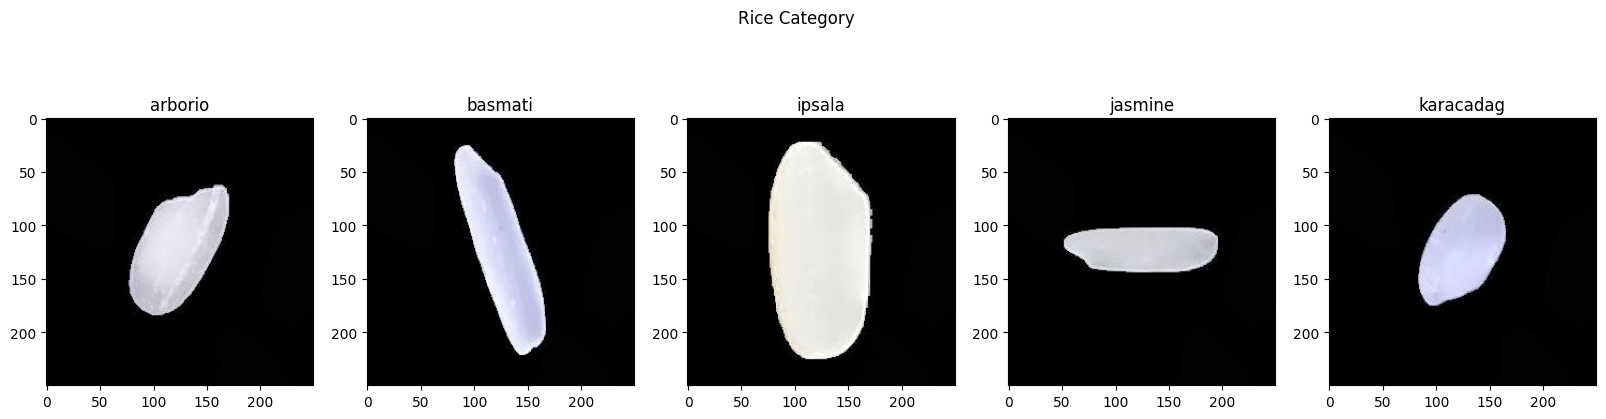

In [5]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_image = img.imread(arborio[0])
basmati_image = img.imread(basmati[0])
ipsala_image = img.imread(ipsala[0])
jasmine_image = img.imread(jasmine[0])
karacadag_image = img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')


ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

In [6]:
# Contains the images path
df_images = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}

# Contains numerical labels for the categories
df_labels = {
    'arborio' : 0,
    'basmati' : 1,
    'ipsala' : 2,
    'jasmine' : 3,
    'karacadag': 4
}

In [45]:
len(df_labels)

5

In [7]:
X, y = [], [] # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
        X.append(resized_img) 
        y.append(df_labels[label])

In [8]:
# Standarizing
X = np.array(X)
X = X/255
y = np.array(y)

In [9]:
# Separating data into training, test and validation sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

In [10]:
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms as T # for simplifying the transforms
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, sampler, random_split
from torchvision import models
## Now, we import timm, torchvision image models
!pip install timm # kaggle doesnt have it installed by default
import timm
from timm.loss import LabelSmoothingCrossEntropy # This is better than normal nn.CrossEntropyLoss

In [11]:
# remove warnings
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import sys
from tqdm import tqdm
import time
import copy

In [12]:
# def get_train_data_loaders(data, batch_size):
# #     if train:
#         #train
#         transform = T.Compose([
#             T.RandomHorizontalFlip(),
#             T.RandomVerticalFlip(),
#             T.RandomApply(torch.nn.ModuleList([T.ColorJitter()]), p=0.25),
#             T.Resize(256),
#             T.CenterCrop(224),
#             T.ToTensor(),
#             T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), # imagenet means
#             T.RandomErasing(p=0.2, value='random')
#         ])
# #         train_data = datasets.ImageFolder(os.path.join(data_dir, "train/"), transform = transform)
#         train_loader = DataLoader(data, batch_size=batch_size, shuffle=True, num_workers=4)
#         return train_loader, len(data)
    

# def get_data_loaders(X_test, X_val, batch_size):
    
#         # val/test
#     transform = T.Compose([ # We dont need augmentation for test transforms
#         T.Resize(256),
#         T.CenterCrop(224),
#         T.ToTensor(),
#         T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)), # imagenet means
#     ])
# #         val_data = datasets.ImageFolder(os.path.join(data_dir, "valid/"), transform=transform)
# #         test_data = datasets.ImageFolder(os.path.join(data_dir, "test/"), transform=transform)
#     val_loader = DataLoader(X_val, batch_size=batch_size, shuffle=True, num_workers=4)
#     test_loader = DataLoader(X_test, batch_size=batch_size, shuffle=True, num_workers=4)
#     return val_loader, test_loader, len(X_val), len(X_test)

In [40]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T

class CustomDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x_sample = self.X[idx]
        y_sample = self.y[idx]
        x_sample = x_sample.astype(np.uint8)  # Convert to uint8
        x_sample = np.squeeze(x_sample)  # Remove singleton dimensions if present
        # Convert NumPy array to PIL Image
        x_sample = Image.fromarray(x_sample)

        if self.transform:
            x_sample = self.transform(x_sample)

        return x_sample, y_sample
    
def get_train_data_loaders(X_train, y_train, batch_size):
    transform = T.Compose([
        T.RandomHorizontalFlip(),
        T.RandomVerticalFlip(),
        T.RandomApply(torch.nn.ModuleList([T.ColorJitter()]), p=0.25),
        T.Resize(256),
        T.CenterCrop(224),
        T.ToTensor(),
        T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
        T.RandomErasing(p=0.2, value='random')
    ])

    train_dataset = CustomDataset(X_train, y_train, transform=transform)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

    return train_loader, len(train_dataset)

def get_data_loaders(X_test, y_test, X_val, y_val, batch_size):
    transform = T.Compose([
        T.Resize(256),
        T.CenterCrop(224),
        T.ToTensor(),
        T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])

    val_dataset = CustomDataset(X_val, y_val, transform=transform)
    test_dataset = CustomDataset(X_test, y_test, transform=transform)

    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=4)

    return val_loader, test_loader, len(val_dataset), len(test_dataset)


In [41]:
batch_size = 128  # Choose an appropriate batch size

# Get training data loader
train_loader, train_size = get_train_data_loaders(X_train, y_train, batch_size)

# Get validation and test data loaders
val_loader, test_loader, val_size, test_size = get_data_loaders(X_test, y_test, X_val, y_val, batch_size)


In [13]:
# (train_loader, train_data_len) = get_train_data_loaders(X_train, 128)
# (val_loader, test_loader, valid_data_len, test_data_len) = get_data_loaders(X_test, X_val,128)
# # X_test, X_val
# # (train_loader, train_data_len) = get_data_loaders(X_train, 128, train=True)


In [30]:
len(train_loader)

18

In [31]:
dataloaders = {
    "train": train_loader,
    "val": val_loader
}

dataset_sizes = {
    "train": train_data_len,
    "val": valid_data_len
}

In [15]:
print(len(train_loader), len(val_loader), len(test_loader))
print(train_data_len, valid_data_len, test_data_len)

18 2 5
2250 188 562


In [16]:
# now, for the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [17]:
model = torch.hub.load('facebookresearch/deit:main', 'deit_tiny_patch16_224', pretrained=True)

Downloading: "https://github.com/facebookresearch/deit/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://dl.fbaipublicfiles.com/deit/deit_tiny_patch16_224-a1311bcf.pth" to /root/.cache/torch/hub/checkpoints/deit_tiny_patch16_224-a1311bcf.pth
100%|██████████| 21.9M/21.9M [00:00<00:00, 96.0MB/s]


In [25]:
for param in model.parameters(): #freeze model
    param.requires_grad = False

n_inputs = model.head.in_features
model.head = nn.Sequential(
    nn.Linear(n_inputs, 512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, len(df_labels))
)
model = model.to(device)
print(model.head)

Sequential(
  (0): Linear(in_features=192, out_features=512, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=512, out_features=5, bias=True)
)


In [26]:
criterion = LabelSmoothingCrossEntropy()
criterion = criterion.to(device)
optimizer = optim.Adam(model.head.parameters(), lr=0.001)
# lr scheduler
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.97)

In [42]:
import copy
import time
import torch
from tqdm import tqdm

def train_model(model, criterion, optimizer, scheduler, train_loader, val_loader, num_epochs=10):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print("-" * 10)
        
        for phase in ['train', 'val']: # We do training and validation phase per epoch
            if phase == 'train':
                model.train() # model to training mode
                data_loader = train_loader
            else:
                model.eval() # model to evaluate
                data_loader = val_loader
            
            running_loss = 0.0
            running_corrects = 0.0
            
            for inputs, labels in tqdm(data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'): # no autograd makes validation go faster
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1) # used for accuracy
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                
            if phase == 'train':
                scheduler.step() # step at the end of the epoch
            
            epoch_loss = running_loss / len(data_loader.dataset)
            epoch_acc =  running_corrects.double() / len(data_loader.dataset)
            
            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))
            
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict()) # keep the best validation accuracy model
        print()
    
    time_elapsed = time.time() - since # slight error
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print("Best Val Acc: {:.4f}".format(best_acc))
    
    model.load_state_dict(best_model_wts)
    return model

# Assuming you have defined train_loader and val_loader
model_ft = train_model(model, criterion, optimizer, exp_lr_scheduler, train_loader, val_loader)


Epoch 0/9
----------


100%|██████████| 18/18 [00:04<00:00,  3.67it/s]


train Loss: 1.6138 Acc: 0.2120


100%|██████████| 2/2 [00:00<00:00,  2.26it/s]


val Loss: 1.6202 Acc: 0.2074

Epoch 1/9
----------


100%|██████████| 18/18 [00:04<00:00,  4.43it/s]


train Loss: 1.6059 Acc: 0.2298


100%|██████████| 2/2 [00:00<00:00,  2.28it/s]


val Loss: 1.6003 Acc: 0.2553

Epoch 2/9
----------


100%|██████████| 18/18 [00:04<00:00,  4.42it/s]


train Loss: 1.6042 Acc: 0.2316


100%|██████████| 2/2 [00:00<00:00,  2.11it/s]


val Loss: 1.5989 Acc: 0.2340

Epoch 3/9
----------


100%|██████████| 18/18 [00:04<00:00,  4.33it/s]


train Loss: 1.5986 Acc: 0.2520


100%|██████████| 2/2 [00:00<00:00,  2.22it/s]


val Loss: 1.5952 Acc: 0.2181

Epoch 4/9
----------


100%|██████████| 18/18 [00:04<00:00,  4.42it/s]


train Loss: 1.6018 Acc: 0.2396


100%|██████████| 2/2 [00:00<00:00,  2.11it/s]


val Loss: 1.5946 Acc: 0.2660

Epoch 5/9
----------


100%|██████████| 18/18 [00:04<00:00,  4.44it/s]


train Loss: 1.5953 Acc: 0.2587


100%|██████████| 2/2 [00:01<00:00,  2.00it/s]


val Loss: 1.5809 Acc: 0.3617

Epoch 6/9
----------


100%|██████████| 18/18 [00:04<00:00,  3.80it/s]


train Loss: 1.5845 Acc: 0.2796


100%|██████████| 2/2 [00:00<00:00,  2.26it/s]


val Loss: 1.5812 Acc: 0.3723

Epoch 7/9
----------


100%|██████████| 18/18 [00:04<00:00,  4.33it/s]


train Loss: 1.5831 Acc: 0.2729


100%|██████████| 2/2 [00:00<00:00,  2.10it/s]


val Loss: 1.5689 Acc: 0.2926

Epoch 8/9
----------


100%|██████████| 18/18 [00:04<00:00,  4.42it/s]


train Loss: 1.5772 Acc: 0.2742


100%|██████████| 2/2 [00:00<00:00,  2.31it/s]


val Loss: 1.5636 Acc: 0.3511

Epoch 9/9
----------


100%|██████████| 18/18 [00:03<00:00,  4.51it/s]


train Loss: 1.5700 Acc: 0.2822


100%|██████████| 2/2 [00:00<00:00,  2.00it/s]

val Loss: 1.5606 Acc: 0.2819

Training complete in 0m 52s
Best Val Acc: 0.3723


In [32]:
# def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
#     since = time.time()
#     best_model_wts = copy.deepcopy(model.state_dict())
#     best_acc = 0.0
    
#     for epoch in range(num_epochs):
#         print(f'Epoch {epoch}/{num_epochs - 1}')
#         print("-"*10)
        
#         for phase in ['train', 'val']: # We do training and validation phase per epoch
#             if phase == 'train':
#                 model.train() # model to training mode
#             else:
#                 model.eval() # model to evaluate
            
#             running_loss = 0.0
#             running_corrects = 0.0
            
#             for inputs, labels in tqdm(dataloaders[phase]):
#                 inputs = inputs.to(device)
#                 labels = labels.to(device)
                
#                 optimizer.zero_grad()
                
#                 with torch.set_grad_enabled(phase == 'train'): # no autograd makes validation go faster
#                     outputs = model(inputs)
#                     _, preds = torch.max(outputs, 1) # used for accuracy
#                     loss = criterion(outputs, labels)
                    
#                     if phase == 'train':
#                         loss.backward()
#                         optimizer.step()
#                 running_loss += loss.item() * inputs.size(0)
#                 running_corrects += torch.sum(preds == labels.data)
                
#             if phase == 'train':
#                 scheduler.step() # step at end of epoch
            
#             epoch_loss = running_loss / dataset_sizes[phase]
#             epoch_acc =  running_corrects.double() / dataset_sizes[phase]
            
#             print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))
            
#             if phase == 'val' and epoch_acc > best_acc:
#                 best_acc = epoch_acc
#                 best_model_wts = copy.deepcopy(model.state_dict()) # keep the best validation accuracy model
#         print()
#     time_elapsed = time.time() - since # slight error
#     print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
#     print("Best Val Acc: {:.4f}".format(best_acc))
    
#     model.load_state_dict(best_model_wts)
#     return model
# model_ft = train_model(model, criterion, optimizer, exp_lr_scheduler) # no

Epoch 0/9
----------


  0%|          | 0/18 [00:00<?, ?it/s]


ValueError: too many values to unpack (expected 2)

In [64]:
classes=list(df_labels.keys())

In [65]:
classes

['arborio', 'basmati', 'ipsala', 'jasmine', 'karacadag']

In [75]:
test_loader

In [77]:
test_loss = 0.0
class_correct = list(0 for i in range(len(classes)))
class_total = list(0 for i in range(len(classes)))
model_ft.eval()

for data, target in tqdm(test_loader):
    data, target = data.to(device), target.to(device)
    with torch.no_grad(): # turn off autograd for faster testing
        output = model_ft(data)
        loss = criterion(output, target)
    test_loss = loss.item() * data.size(0)
    _, pred = torch.max(output, 1)
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.cpu().numpy())
    if len(target) == 32:
        for i in range(32):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

test_loss = test_loss / test_data_len
print('Test Loss: {:.4f}'.format(test_loss))
for i in range(len(classes)):
    if class_total[i] > 0:
        print("Test Accuracy of %5s: %2d%% (%2d/%2d)" % (
            classes[i], 100*class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])
        ))
    else:
        print("Test accuracy of %5s: NA" % (classes[i]))
print("Test Accuracy of %2d%% (%2d/%2d)" % (
            100*np.sum(class_correct)/np.sum(class_total), np.sum(class_correct), np.sum(class_total)
        ))

100%|██████████| 5/5 [00:01<00:00,  3.15it/s]


Test Loss: 0.1397
Test accuracy of arborio: NA
Test accuracy of basmati: NA
Test accuracy of ipsala: NA
Test accuracy of jasmine: NA
Test accuracy of karacadag: NA


ValueError: cannot convert float NaN to integer

In [79]:
import copy
import time
import torch
from tqdm import tqdm

def train_model(model, criterion, optimizer, scheduler, train_loader, val_loader, test_loader, num_epochs=20):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print("-" * 10)
        
        for phase in ['train', 'val', 'test']: # Add 'test' phase
            if phase == 'train':
                model.train()  # model to training mode
                data_loader = train_loader
            elif phase == 'val':
                model.eval()   # model to evaluate
                data_loader = val_loader
            else:
                model.eval()   # model to evaluate (test mode)
                data_loader = test_loader
            
            running_loss = 0.0
            running_corrects = 0.0
            
            for inputs, labels in tqdm(data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):  # no autograd makes validation/test go faster
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)  # used for accuracy
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                
            if phase == 'train':
                scheduler.step()  # step at the end of the epoch
            
            epoch_loss = running_loss / len(data_loader.dataset)
            epoch_acc = running_corrects.double() / len(data_loader.dataset)
            
            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))
            
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())  # keep the best validation accuracy model
        print()
    
    time_elapsed = time.time() - since  # slight error
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print("Best Val Acc: {:.4f}".format(best_acc))
    
    model.load_state_dict(best_model_wts)
    return model

# Assuming you have defined train_loader, val_loader, and test_loader
model_ft = train_model(model, criterion, optimizer, exp_lr_scheduler, train_loader, val_loader, test_loader)


Epoch 0/9
----------


100%|██████████| 18/18 [00:03<00:00,  4.51it/s]


train Loss: 1.5417 Acc: 0.2960


100%|██████████| 2/2 [00:00<00:00,  2.16it/s]


val Loss: 1.5307 Acc: 0.3085


100%|██████████| 5/5 [00:01<00:00,  3.42it/s]


test Loss: 1.5520 Acc: 0.2900

Epoch 1/9
----------


100%|██████████| 18/18 [00:04<00:00,  4.32it/s]


train Loss: 1.5404 Acc: 0.2991


100%|██████████| 2/2 [00:00<00:00,  2.16it/s]


val Loss: 1.5113 Acc: 0.3670


100%|██████████| 5/5 [00:01<00:00,  3.20it/s]


test Loss: 1.5330 Acc: 0.3541

Epoch 2/9
----------


100%|██████████| 18/18 [00:04<00:00,  4.45it/s]


train Loss: 1.5378 Acc: 0.3307


100%|██████████| 2/2 [00:00<00:00,  2.13it/s]


val Loss: 1.5176 Acc: 0.3351


100%|██████████| 5/5 [00:01<00:00,  3.28it/s]


test Loss: 1.5435 Acc: 0.3060

Epoch 3/9
----------


100%|██████████| 18/18 [00:04<00:00,  4.45it/s]


train Loss: 1.5333 Acc: 0.3058


100%|██████████| 2/2 [00:00<00:00,  2.13it/s]


val Loss: 1.5088 Acc: 0.3404


100%|██████████| 5/5 [00:01<00:00,  3.31it/s]


test Loss: 1.5335 Acc: 0.3167

Epoch 4/9
----------


100%|██████████| 18/18 [00:04<00:00,  4.45it/s]


train Loss: 1.5324 Acc: 0.3196


100%|██████████| 2/2 [00:00<00:00,  2.25it/s]


val Loss: 1.5122 Acc: 0.4362


100%|██████████| 5/5 [00:01<00:00,  3.23it/s]


test Loss: 1.5334 Acc: 0.4021

Epoch 5/9
----------


100%|██████████| 18/18 [00:03<00:00,  4.54it/s]


train Loss: 1.5273 Acc: 0.3347


100%|██████████| 2/2 [00:00<00:00,  2.27it/s]


val Loss: 1.5034 Acc: 0.3457


100%|██████████| 5/5 [00:01<00:00,  3.29it/s]


test Loss: 1.5288 Acc: 0.3132

Epoch 6/9
----------


100%|██████████| 18/18 [00:03<00:00,  4.56it/s]


train Loss: 1.5327 Acc: 0.3231


100%|██████████| 2/2 [00:00<00:00,  2.15it/s]


val Loss: 1.5093 Acc: 0.3989


100%|██████████| 5/5 [00:01<00:00,  2.69it/s]


test Loss: 1.5318 Acc: 0.3523

Epoch 7/9
----------


100%|██████████| 18/18 [00:04<00:00,  4.34it/s]


train Loss: 1.5306 Acc: 0.3142


100%|██████████| 2/2 [00:00<00:00,  2.10it/s]


val Loss: 1.5092 Acc: 0.3723


100%|██████████| 5/5 [00:01<00:00,  3.39it/s]


test Loss: 1.5339 Acc: 0.3345

Epoch 8/9
----------


100%|██████████| 18/18 [00:04<00:00,  4.40it/s]


train Loss: 1.5376 Acc: 0.3004


100%|██████████| 2/2 [00:00<00:00,  2.03it/s]


val Loss: 1.5005 Acc: 0.3032


100%|██████████| 5/5 [00:01<00:00,  3.42it/s]


test Loss: 1.5263 Acc: 0.2918

Epoch 9/9
----------


100%|██████████| 18/18 [00:04<00:00,  4.43it/s]


train Loss: 1.5300 Acc: 0.3209


100%|██████████| 2/2 [00:00<00:00,  2.28it/s]


val Loss: 1.4985 Acc: 0.4096


100%|██████████| 5/5 [00:01<00:00,  3.21it/s]

test Loss: 1.5232 Acc: 0.3754

Training complete in 1m 6s
Best Val Acc: 0.4362


In [ ]:
example = torch.rand(1, 3, 224, 224)
traced_script_module = torch.jit.trace(model.cpu(), example)
traced_script_module.save("butterfly_deit_video.pt")